# Problem Understanding & Dataset Analysis

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/data-crunch-round-1/sample_submission.csv
/kaggle/input/data-crunch-round-1/train.csv
/kaggle/input/data-crunch-round-1/test.csv


### To Load the Data in Kaggle Notebook

In [2]:
import pandas as pd

# Load training data
train_df = pd.read_csv("/kaggle/input/data-crunch-round-1/train.csv")


# Load testing data
test_df = pd.read_csv("/kaggle/input/data-crunch-round-1/test.csv")


# Load sample submission file (optional - for futher works)
sample_submission = pd.read_csv("/kaggle/input/data-crunch-round-1/sample_submission.csv")



### Load data

In [3]:
print(train_df.head())  # Display first few rows
print(test_df.head())  # Display first few rows
print(sample_submission.head())   #(optional - for test)

   ID  Year  Month  Day   kingdom   latitude  longitude  Avg_Temperature  \
0   1     1      4    1   Arcadia  24.280002 -37.229980            25.50   
1   2     1      4    1  Atlantis  22.979999 -37.329990           299.65   
2   3     1      4    1    Avalon  22.880000 -37.130006            26.30   
3   4     1      4    1   Camelot  24.180003 -36.929994            24.00   
4   5     1      4    1     Dorne  25.780002 -37.530000            28.00   

   Avg_Feels_Like_Temperature  Temperature_Range  \
0                       30.50                8.5   
1                      305.15                5.9   
2                       31.50                5.2   
3                       28.40                8.2   
4                       32.80                5.7   

   Feels_Like_Temperature_Range  Radiation  Rain_Amount  Rain_Duration  \
0                          10.3      22.52        58.89             16   
1                           8.2      22.73        11.83             12   
2       

### Check the structure 

In [4]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4530 entries, 0 to 4529
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   ID       4530 non-null   int64 
 1   Year     4530 non-null   int64 
 2   Month    4530 non-null   int64 
 3   Day      4530 non-null   int64 
 4   kingdom  4530 non-null   object
dtypes: int64(4), object(1)
memory usage: 177.1+ KB


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84960 entries, 0 to 84959
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            84960 non-null  int64  
 1   Year                          84960 non-null  int64  
 2   Month                         84960 non-null  int64  
 3   Day                           84960 non-null  int64  
 4   kingdom                       84960 non-null  object 
 5   latitude                      84960 non-null  float64
 6   longitude                     84960 non-null  float64
 7   Avg_Temperature               84960 non-null  float64
 8   Avg_Feels_Like_Temperature    84960 non-null  float64
 9   Temperature_Range             84960 non-null  float64
 10  Feels_Like_Temperature_Range  84960 non-null  float64
 11  Radiation                     84960 non-null  float64
 12  Rain_Amount                   84960 non-null  float64
 13  R

In [6]:
print(test_df.describe())

                 ID    Year        Month          Day
count   4530.000000  4530.0  4530.000000  4530.000000
mean   87225.500000     9.0     3.013245    15.622517
std     1307.842689     0.0     1.423644     8.751929
min    84961.000000     9.0     1.000000     1.000000
25%    86093.250000     9.0     2.000000     8.000000
50%    87225.500000     9.0     3.000000    16.000000
75%    88357.750000     9.0     4.000000    23.000000
max    89490.000000     9.0     5.000000    31.000000


In [7]:
print(train_df.describe())

                 ID          Year         Month           Day      latitude  \
count  84960.000000  84960.000000  84960.000000  84960.000000  84960.000000   
mean   42480.500000      4.610876      6.666667     15.735876     24.003334   
std    24525.983772      2.239331      3.402793      8.802867      0.798622   
min        1.000000      1.000000      1.000000      1.000000     22.880000   
25%    21240.750000      3.000000      4.000000      8.000000     23.680003   
50%    42480.500000      5.000000      7.000000     16.000000     23.780002   
75%    63720.250000      7.000000     10.000000     23.000000     24.280002   
max    84960.000000      8.000000     12.000000     31.000000     26.580005   

          longitude  Avg_Temperature  Avg_Feels_Like_Temperature  \
count  84960.000000     84960.000000                84960.000000   
mean     -37.266665       135.600751                  139.735375   
std        0.488873       133.650417                  133.937168   
min      -37.729

### Look for missing values 

In [8]:
train_df.isnull().sum()

ID                              0
Year                            0
Month                           0
Day                             0
kingdom                         0
latitude                        0
longitude                       0
Avg_Temperature                 0
Avg_Feels_Like_Temperature      0
Temperature_Range               0
Feels_Like_Temperature_Range    0
Radiation                       0
Rain_Amount                     0
Rain_Duration                   0
Wind_Speed                      0
Wind_Direction                  0
Evapotranspiration              0
dtype: int64

In [9]:
test_df.isnull().sum()

ID         0
Year       0
Month      0
Day        0
kingdom    0
dtype: int64

## Check for duplicate 


In [10]:
# Count duplicate rows - train_df
duplicate_count = train_df.duplicated().sum()

print(f"Number of duplicate rows (train): {duplicate_count}")


Number of duplicate rows (train): 0


In [11]:
# Count duplicate rows - test_df
duplicate_count = test_df.duplicated().sum()

print(f"Number of duplicate rows (test): {duplicate_count}")

Number of duplicate rows (test): 0


In [12]:
# Filter kingdom 'X' and convert temperature from Kelvin to Celsius
kingdom_x_df = train_df[train_df['kingdom'] == 'X'].copy()  # Filter rows where kingdom is 'X'

# Convert Avg_Temperature from Kelvin to Celsius
kingdom_x_df['Avg_Temperature_C'] = kingdom_x_df['Avg_Temperature'] - 273.15

# Display the first few rows
print(kingdom_x_df[['kingdom', 'Avg_Temperature', 'Avg_Temperature_C']].head())


Empty DataFrame
Columns: [kingdom, Avg_Temperature, Avg_Temperature_C]
Index: []


In [13]:
print(train_df['kingdom'].unique())  # Check available unique values


['Arcadia' 'Atlantis' 'Avalon' 'Camelot' 'Dorne' 'Eden' 'El Dorado'
 'Elysium' 'Emerald City' 'Helios' 'Krypton' 'Metropolis' 'Midgar'
 'Midgard' 'Mordor' 'Neo-City' 'Neo-Tokyo' 'Nirvana' 'Olympus' 'Pandora'
 'Rapture' 'Rivendell' 'Serenity' 'Shangri-La' 'Solara' 'Solstice'
 'Sunspear' 'Utopia' 'Valyria' 'Winterfell']


## Confirm Continuous Periods

In [14]:
# Step 1: Check if there are any missing or invalid 'Month' values
print(train_df['Month'].unique())  # Check unique values in 'Month' to identify any problems




[ 4  5  6  7  8  9 10 11 12  1  2  3]


In [15]:
# Step 2: Ensure 'Month' column has two digits (e.g., '01', '02', etc.)
train_df['Month'] = train_df['Month'].apply(lambda x: f"{int(x):02d}" if pd.notnull(x) else '01')



In [16]:
# Step 3: Create the 'Date' column by combining 'Year' and 'Month', assuming the 1st day of each month
train_df['Date'] = pd.to_datetime(train_df['Year'].astype(str) + '-' + train_df['Month'] + '-01', format='%Y-%m-%d', errors='coerce')



In [17]:
# Step 4: Check for any rows where the 'Date' couldn't be created (NaT values)
print(train_df[train_df['Date'].isna()])



          ID  Year Month  Day     kingdom   latitude  longitude  \
0          1     1    04    1     Arcadia  24.280002 -37.229980   
1          2     1    04    1    Atlantis  22.979999 -37.329990   
2          3     1    04    1      Avalon  22.880000 -37.130006   
3          4     1    04    1     Camelot  24.180003 -36.929994   
4          5     1    04    1       Dorne  25.780002 -37.530000   
...      ...   ...   ...  ...         ...        ...        ...   
84955  84956     8    12   31    Solstice  25.479998 -36.329990   
84956  84957     8    12   31    Sunspear  26.580005 -37.530000   
84957  84958     8    12   31      Utopia  23.979999 -37.630006   
84958  84959     8    12   31     Valyria  24.280002 -35.729980   
84959  84960     8    12   31  Winterfell  23.979999 -36.429994   

       Avg_Temperature  Avg_Feels_Like_Temperature  Temperature_Range  \
0                25.50                       30.50                8.5   
1               299.65                      305.1

In [18]:
# Step 5: Sort the DataFrame by 'Date'
train_df = train_df.sort_values(by='Date')

# Step 6: Check the difference between consecutive dates
train_df['Date_Diff'] = train_df['Date'].diff()

# Step 7: Check for any gaps (where the difference is not one month)
gaps = train_df[train_df['Date_Diff'] != pd.Timedelta('30 days')]

# Display rows with gaps
print(gaps[['Year', 'Month', 'Date', 'Date_Diff']])

       Year Month Date Date_Diff
0         1    04  NaT       NaT
1         1    04  NaT       NaT
2         1    04  NaT       NaT
3         1    04  NaT       NaT
4         1    04  NaT       NaT
...     ...   ...  ...       ...
84955     8    12  NaT       NaT
84956     8    12  NaT       NaT
84957     8    12  NaT       NaT
84958     8    12  NaT       NaT
84959     8    12  NaT       NaT

[84960 rows x 4 columns]


### Flag Invalid Date

In [19]:
# Step 1: Ensure 'Month' column has two digits (e.g., '01', '02', etc.)
train_df['Month'] = train_df['Month'].apply(lambda x: f"{int(x):02d}" if pd.notnull(x) else '01')

# Step 2: Create the 'Date' column by combining 'Year' and 'Month', assuming the 1st day of each month
train_df['Date'] = pd.to_datetime(train_df['Year'].astype(str) + '-' + train_df['Month'] + '-01', format='%Y-%m-%d', errors='coerce')

# Step 3: Flag records with invalid dates (NaT values)
invalid_dates = train_df[train_df['Date'].isna()]

# Step 4: Display records with invalid dates
print("Records with invalid dates:")
print(invalid_dates[['Year', 'Month', 'Date']])


Records with invalid dates:
       Year Month Date
0         1    04  NaT
1         1    04  NaT
2         1    04  NaT
3         1    04  NaT
4         1    04  NaT
...     ...   ...  ...
84955     8    12  NaT
84956     8    12  NaT
84957     8    12  NaT
84958     8    12  NaT
84959     8    12  NaT

[84960 rows x 3 columns]


### plot histograms for numerical variables

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

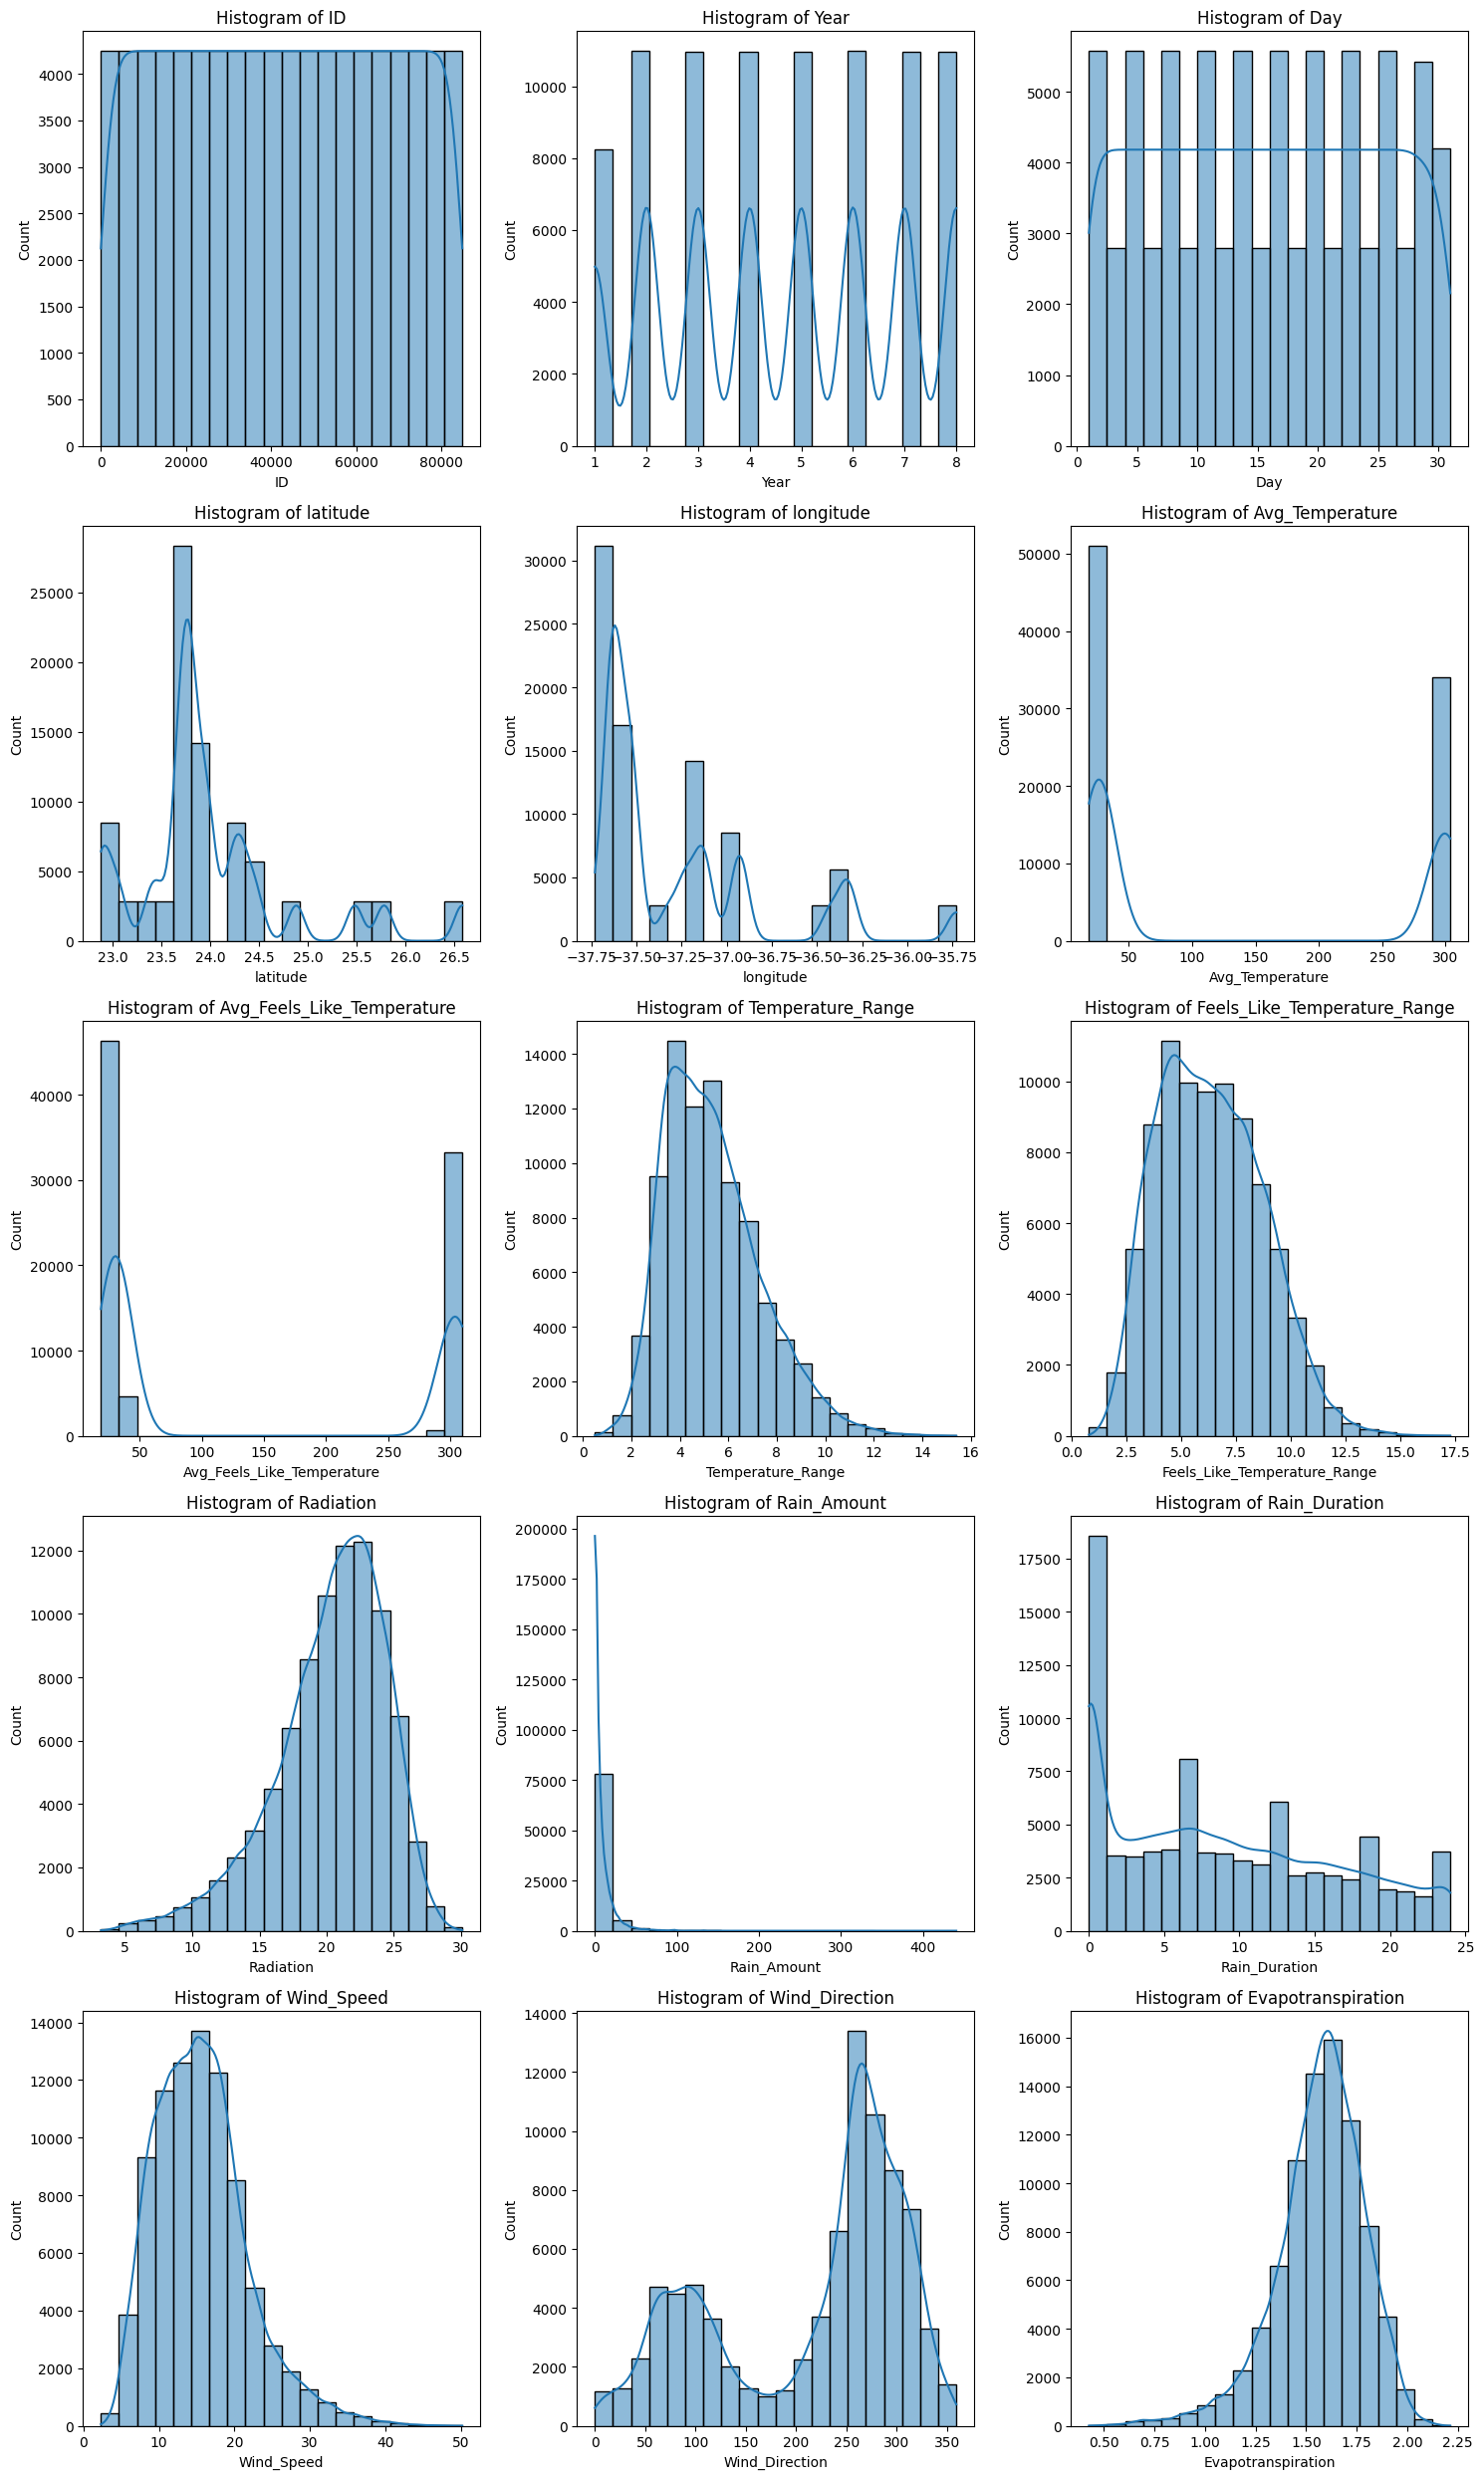

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Step 1: Select numerical columns
numerical_cols = train_df.select_dtypes(include=['float64', 'int64']).columns

# Step 2: Calculate grid dimensions (rows and columns) based on the number of numerical columns
num_cols = len(numerical_cols)
num_rows = int(np.ceil(num_cols / 3))  # Create enough rows (3 columns per row)

# Step 3: Plot histograms for each numerical variable
plt.figure(figsize=(15, num_rows * 5))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(num_rows, 3, i)  # Adjust the number of rows and columns dynamically
    sns.histplot(train_df[col], kde=True, bins=20)  # KDE (Kernel Density Estimate) added for smoothness
    plt.title(f"Histogram of {col}")
    plt.tight_layout()

plt.show()


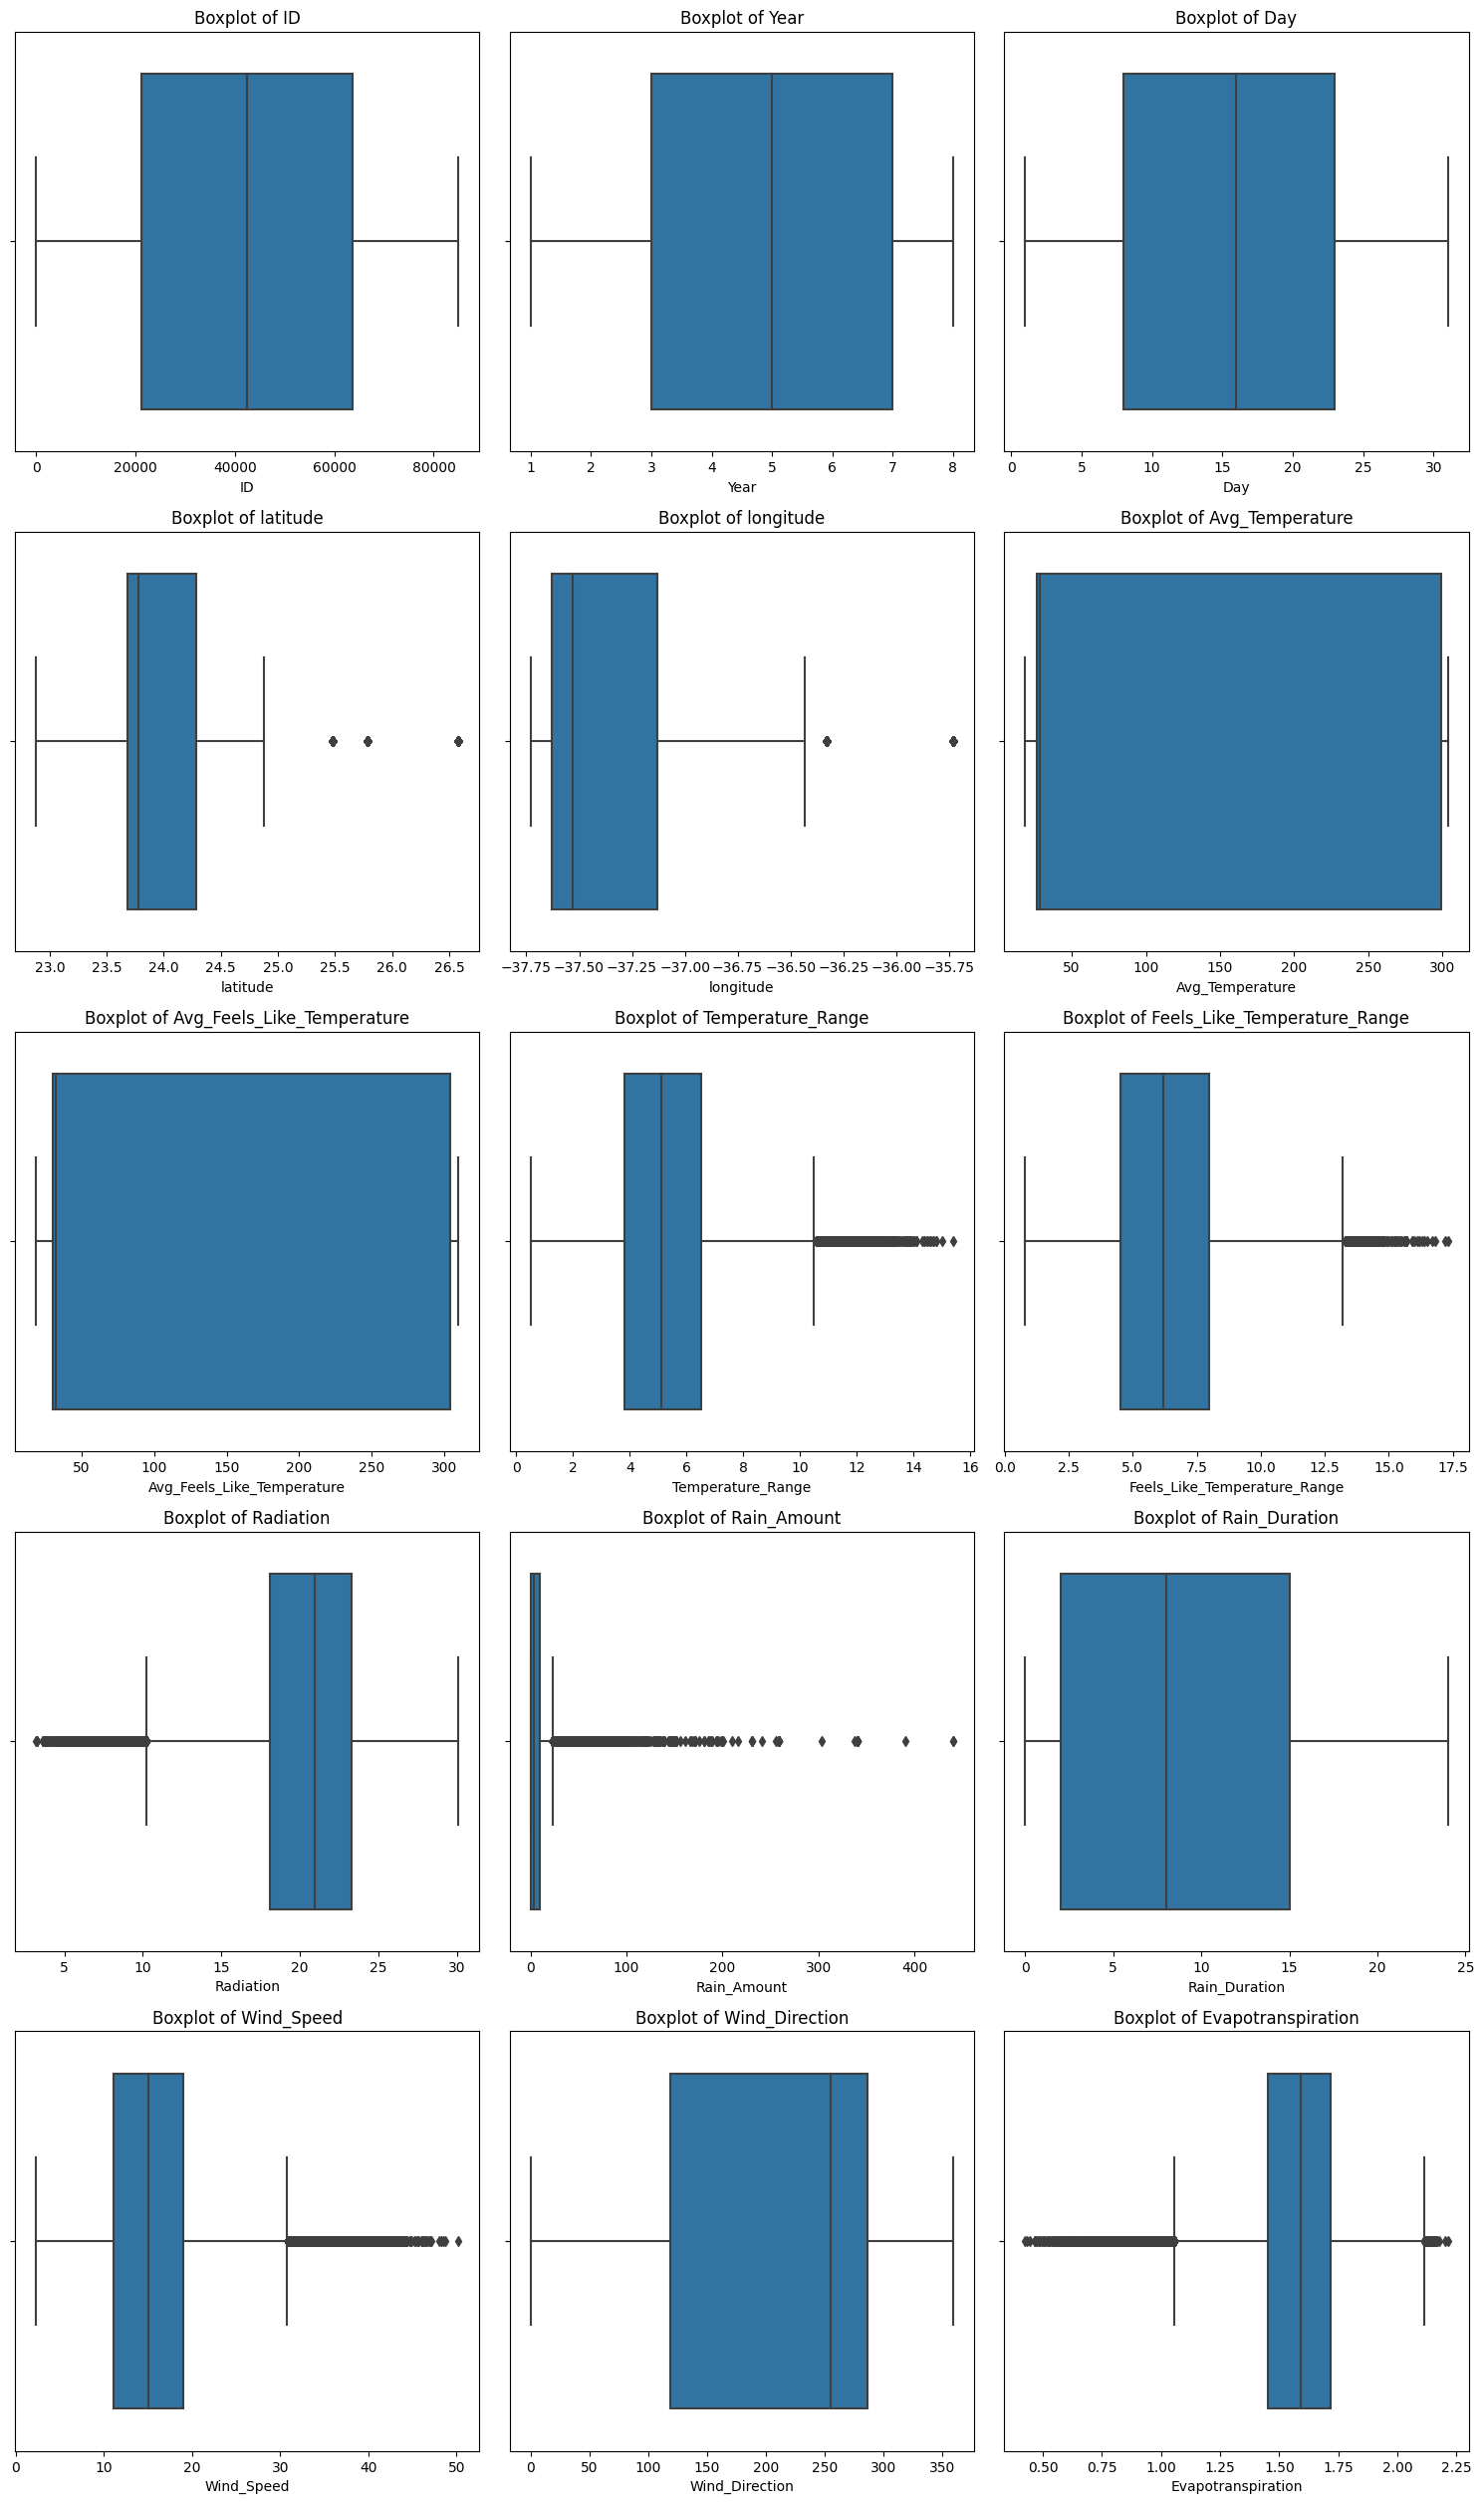

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Select numerical columns
numerical_cols = train_df.select_dtypes(include=['float64', 'int64']).columns

# Step 2: Plot boxplots for each numerical variable
plt.figure(figsize=(15, len(numerical_cols) * 5))  # Dynamically adjust the height based on the number of columns
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(len(numerical_cols), 3, i)  # One boxplot per row
    sns.boxplot(data=train_df, x=col)
    plt.title(f"Boxplot of {col}")
    plt.tight_layout()

plt.show()


# Correlation Analysis

### pairwise correlations to identify relationships 

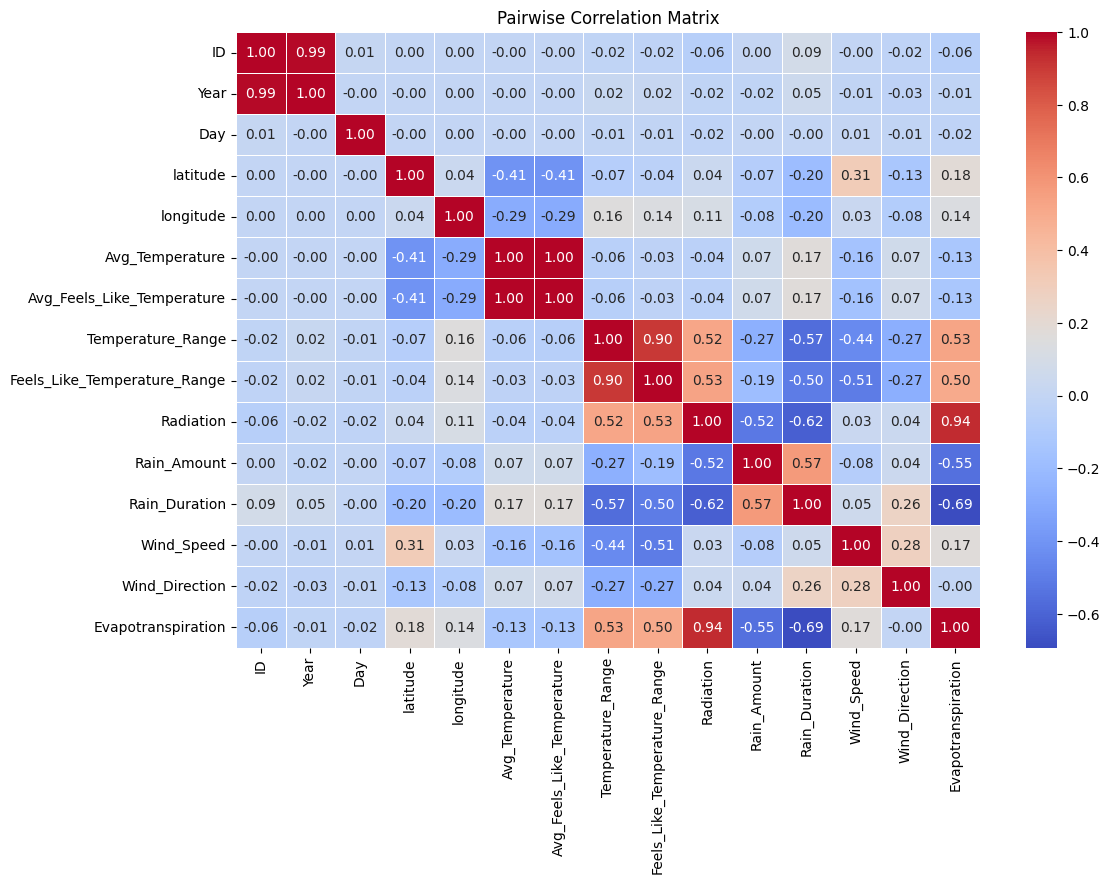

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Compute the correlation matrix for numerical columns
correlation_matrix = train_df.select_dtypes(include=['float64', 'int64']).corr()

# Step 2: Plot the correlation matrix as a heatmap
plt.figure(figsize=(12, 8))  # Set the figure size for better readability
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Adding title and showing the plot
plt.title('Pairwise Correlation Matrix')
plt.show()


/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


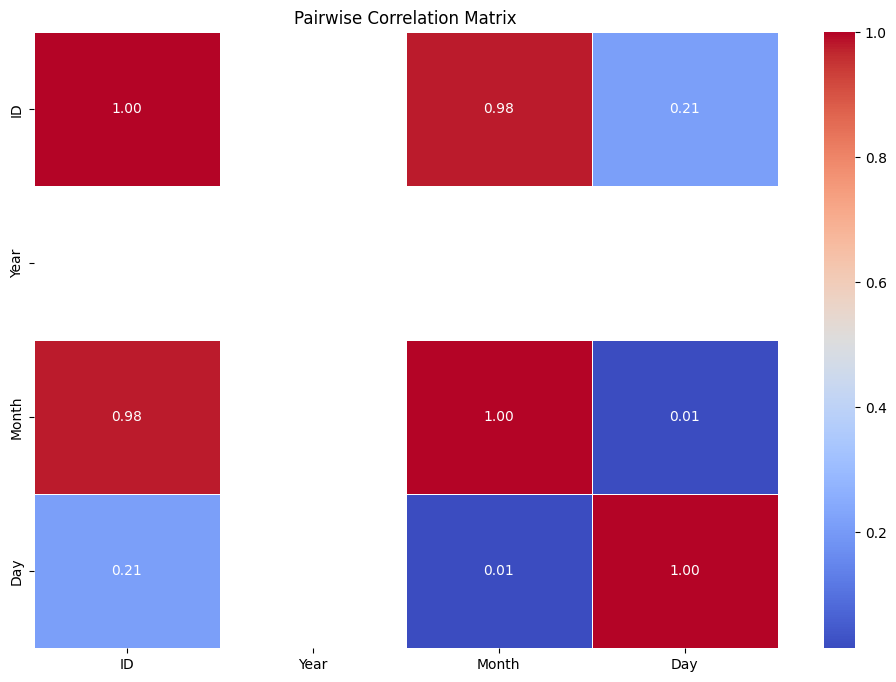

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Compute the correlation matrix for numerical columns
correlation_matrix_test = test_df.select_dtypes(include=['float64', 'int64']).corr()

# Step 2: Plot the correlation matrix as a heatmap
plt.figure(figsize=(12, 8))  # Set the figure size for better readability
sns.heatmap(correlation_matrix_test, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Adding title and showing the plot
plt.title('Pairwise Correlation Matrix')
plt.show()


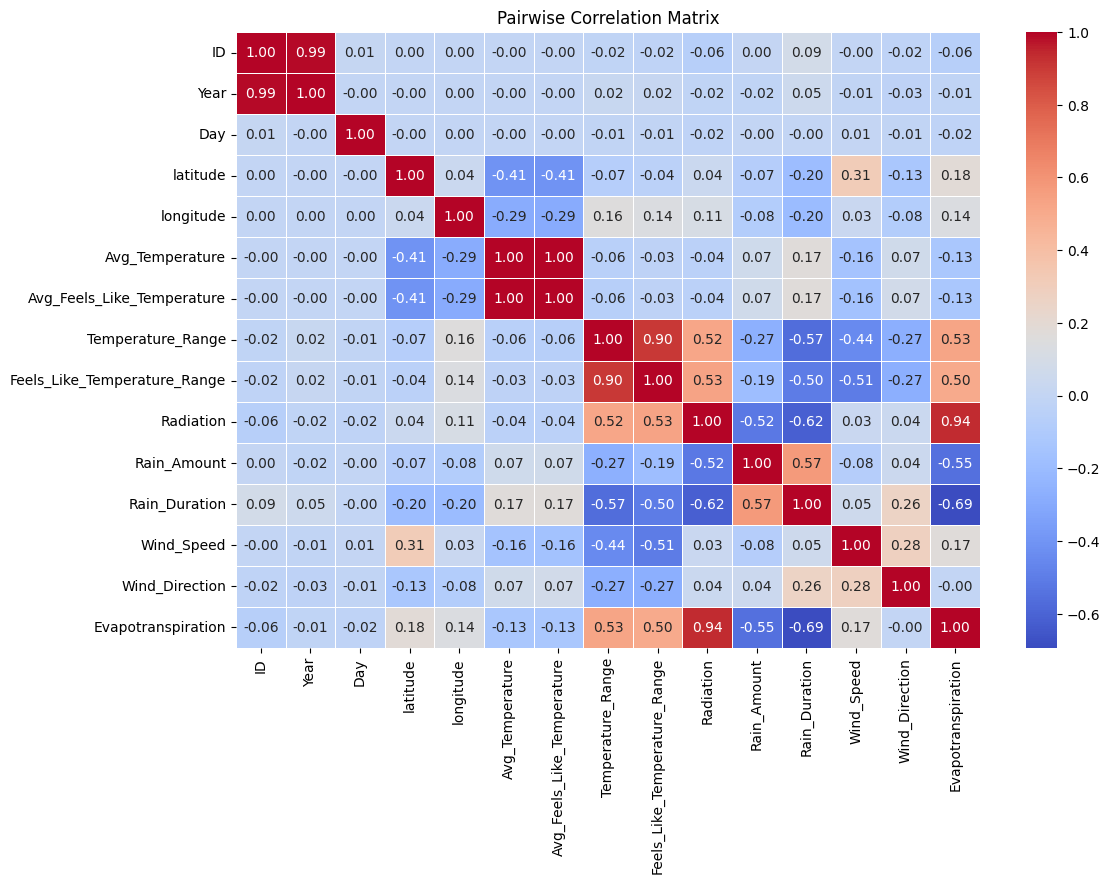

In [24]:
# Replace NaN values with 0 in the correlation matrix
correlation_matrix = correlation_matrix.fillna(0)

# Plot the heatmap again
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Pairwise Correlation Matrix')
plt.show()


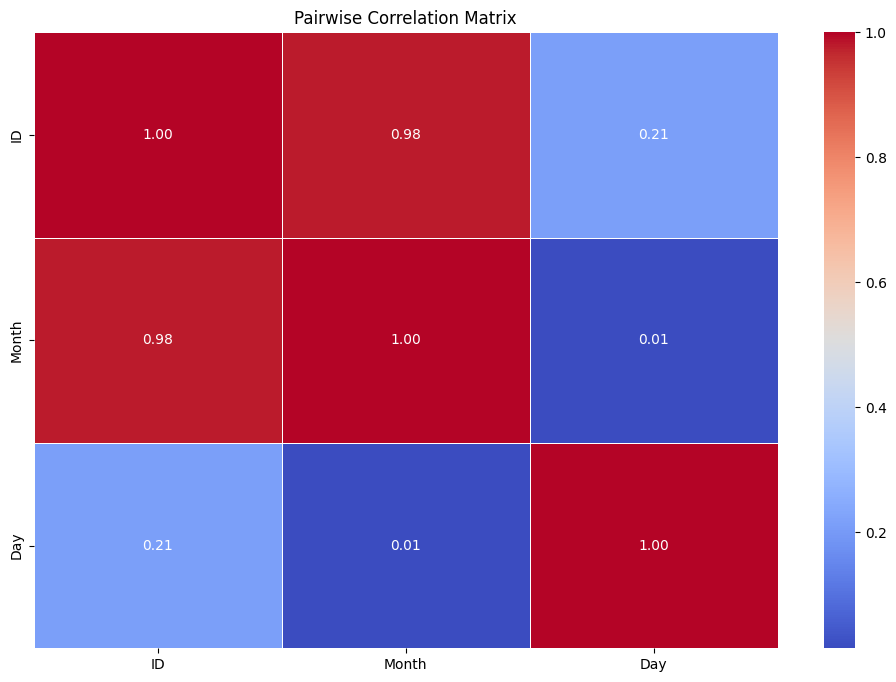

In [25]:
# Drop constant columns before computing the correlation matrix
test_df_clean = test_df.loc[:, test_df.nunique() > 1]  # Remove columns with only one unique value

# Compute the correlation matrix
correlation_matrix = test_df_clean.select_dtypes(include=['float64', 'int64']).corr()

# Plot the heatmap again
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Pairwise Correlation Matrix')
plt.show()


# Data Preprocessing

### Unit Standardization